In [41]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, MaxPooling2D, Dense
from tensorflow.keras.models import Model
from keras.layers import Dense , Activation , Dropout ,Flatten

#### Helper Functions

In [2]:
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.

    Args:
      dir_path (str): target directory

    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# FER2013 Dataset

Dataset : [Facial Expression Recognition 2013](https://www.kaggle.com/datasets/msambare/fer2013)

The data consists of 48x48 pixel grayscale images of faces.The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

In [5]:
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'

In [6]:
walk_through_dir('/kaggle/input/fer2013')

There are 2 directories and 0 images in '/kaggle/input/fer2013'.
There are 7 directories and 0 images in '/kaggle/input/fer2013/test'.
There are 0 directories and 831 images in '/kaggle/input/fer2013/test/surprise'.
There are 0 directories and 1024 images in '/kaggle/input/fer2013/test/fear'.
There are 0 directories and 958 images in '/kaggle/input/fer2013/test/angry'.
There are 0 directories and 1233 images in '/kaggle/input/fer2013/test/neutral'.
There are 0 directories and 1247 images in '/kaggle/input/fer2013/test/sad'.
There are 0 directories and 111 images in '/kaggle/input/fer2013/test/disgust'.
There are 0 directories and 1774 images in '/kaggle/input/fer2013/test/happy'.
There are 7 directories and 0 images in '/kaggle/input/fer2013/train'.
There are 0 directories and 3171 images in '/kaggle/input/fer2013/train/surprise'.
There are 0 directories and 4097 images in '/kaggle/input/fer2013/train/fear'.
There are 0 directories and 3995 images in '/kaggle/input/fer2013/train/angry'

## Get Data Ready For Training

In [25]:
IMG_SIZE = (48,48)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 color_mode='grayscale',
                                                                 label_mode='categorical',
                                                                 batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 color_mode='grayscale',
                                                                 label_mode='categorical',
                                                                 batch_size=BATCH_SIZE)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [26]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [16]:
train_data.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

#CNN Model Experiment

In [6]:
def Create_CNN_Model():

    model = Sequential()

    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
     #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))


    #Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7,activation='softmax'))


    return model

In [7]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                        

In [8]:
CNN_Model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [9]:
def scheduler(epoch, lr):
  if epoch < 7:
     return lr
  else:
     return lr * tf.math.exp(-0.1)

In [11]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [32]:
history = CNN_Model.fit(train_data,
                        validation_data=test_data,
                        epochs=28,
                        batch_size=32,
                        callbacks=[callback],
                        steps_per_epoch=len(train_data),
                        validation_steps=int(0.5*len(test_data)))

Epoch 1/28


2023-08-11 00:23:24.089849: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 72s 134ms/step - loss: 2.0063 - accuracy: 0.2333 - val_loss: 1.6341 - val_accuracy: 0.3577 - lr: 0.0010
Epoch 2/28
449/449 [==============================] - 20s 44ms/step - loss: 1.5932 - accuracy: 0.3783 - val_loss: 1.5417 - val_accuracy: 0.4135 - lr: 0.0010
Epoch 3/28
449/449 [==============================] - 21s 46ms/step - loss: 1.4174 - accuracy: 0.4574 - val_loss: 1.3360 - val_accuracy: 0.4796 - lr: 0.0010
Epoch 4/28
449/449 [==============================] - 20s 45ms/step - loss: 1.3091 - accuracy: 0.5047 - val_loss: 1.3091 - val_accuracy: 0.5047 - lr: 0.0010
Epoch 5/28
449/449 [==============================] - 21s 46ms/step - loss: 1.2383 - accuracy: 0.5376 - val_loss: 1.3343 - val_accuracy: 0.5061 - lr: 0.0010
Epoch 6/28
449/449 [==============================] - 20s 44ms/step - loss: 1.1932 - accuracy: 0.5589 - val_loss: 1.1920 - val_accuracy: 0.5544 - lr: 0.0010
Epoch 7/28
449/449 [==============================] - 20s 44ms/step 

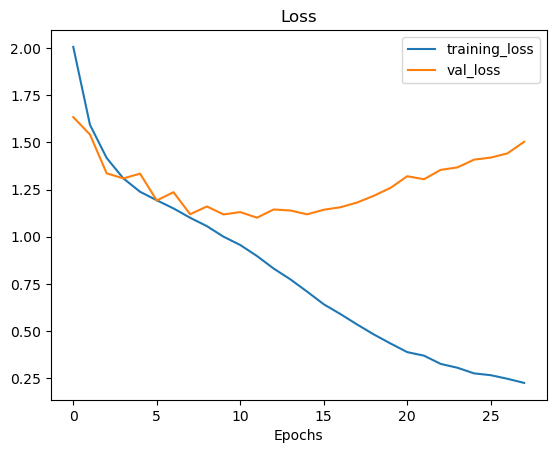

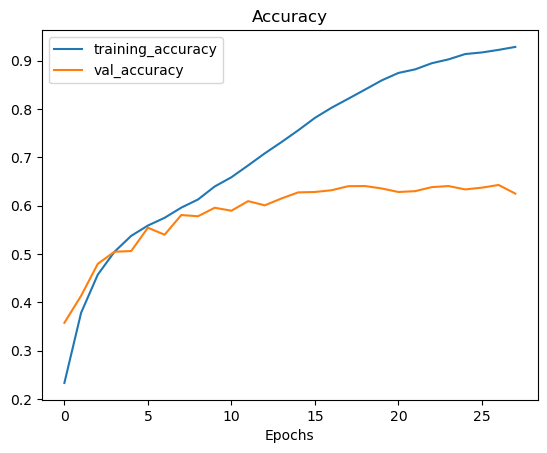

In [35]:
plot_loss_curves(history)

In [25]:
#Try Data Augmentation
IMG_SIZE = (48,48)
BATCH_SIZE = 64

train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        #Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(directory=train_dir,
                                                    color_mode='grayscale',
                                                    class_mode="categorical",
                                                    target_size=IMG_SIZE,
                                                    shuffle=True,
                                                    batch_size=BATCH_SIZE)
test_data = test_preprocessor.flow_from_directory(directory=test_dir,
                                                    color_mode='grayscale',
                                                    class_mode="categorical",
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [26]:
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [27]:
def scheduler(epoch, lr):
  if epoch % 7 == 0:
     return lr * tf.math.exp(-0.1)
  else:
     return lr
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [28]:
history_2 = CNN_Model.fit(train_data,
                          validation_data=test_data,
                          epochs=28,
                          batch_size=BATCH_SIZE,
                          callbacks=[callback],
                          steps_per_epoch=steps_per_epoch,
                          validation_steps=validation_steps)

Epoch 1/28
448/448 [==============================] - 70s 155ms/step - loss: 1.7245 - accuracy: 0.2977 - val_loss: 1.7785 - val_accuracy: 0.2920 - lr: 9.0484e-04
Epoch 2/28
448/448 [==============================] - 50s 110ms/step - loss: 1.6239 - accuracy: 0.3572 - val_loss: 1.5195 - val_accuracy: 0.4037 - lr: 9.0484e-04
Epoch 3/28
448/448 [==============================] - 51s 113ms/step - loss: 1.5096 - accuracy: 0.4091 - val_loss: 1.3644 - val_accuracy: 0.4682 - lr: 9.0484e-04
Epoch 4/28
448/448 [==============================] - 51s 113ms/step - loss: 1.4237 - accuracy: 0.4508 - val_loss: 1.5768 - val_accuracy: 0.3627 - lr: 9.0484e-04
Epoch 5/28
448/448 [==============================] - 51s 115ms/step - loss: 1.3735 - accuracy: 0.4737 - val_loss: 1.2766 - val_accuracy: 0.5031 - lr: 9.0484e-04
Epoch 6/28
448/448 [==============================] - 50s 112ms/step - loss: 1.3274 - accuracy: 0.4954 - val_loss: 1.3104 - val_accuracy: 0.4923 - lr: 9.0484e-04
Epoch 7/28
448/448 [========

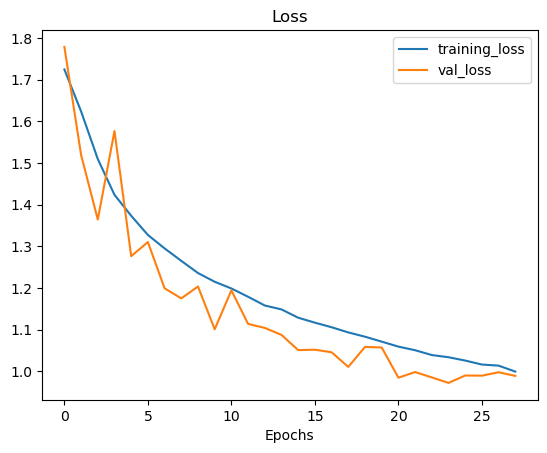

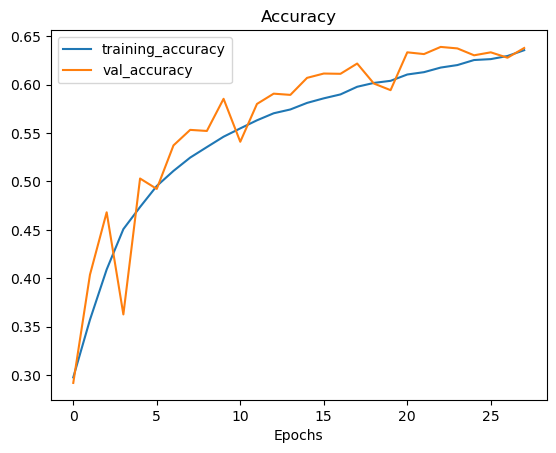

In [29]:
plot_loss_curves(history_2)

In [32]:
CNN_Model.save('CNN_Model_Data_Aug.h5')

In [33]:
import joblib
joblib.dump(CNN_Model, 'CNN_Model_Data_Aug.pkl')

['CNN_Model_Data_Aug.pkl']

In [34]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [35]:
history_3 = CNN_Model.fit(train_data,
                          validation_data=test_data,
                          epochs=48,
                          batch_size=BATCH_SIZE,
                          callbacks=[callback],
                          steps_per_epoch=steps_per_epoch,
                          validation_steps=validation_steps)

Epoch 1/48


2023-08-11 07:21:27.298865: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/StatefulPartitionedCall/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/448 [==============================] - 84s 182ms/step - loss: 1.0042 - accuracy: 0.6310 - val_loss: 1.0040 - val_accuracy: 0.6243 - lr: 6.7032e-04
Epoch 2/48
448/448 [==============================] - 53s 119ms/step - loss: 0.9819 - accuracy: 0.6389 - val_loss: 0.9570 - val_accuracy: 0.6473 - lr: 6.7032e-04
Epoch 3/48
448/448 [==============================] - 52s 116ms/step - loss: 0.9810 - accuracy: 0.6407 - val_loss: 1.0058 - val_accuracy: 0.6264 - lr: 6.7032e-04
Epoch 4/48
448/448 [==============================] - 51s 113ms/step - loss: 0.9800 - accuracy: 0.6413 - val_loss: 0.9365 - val_accuracy: 0.6487 - lr: 6.7032e-04
Epoch 5/48
448/448 [==============================] - 54s 120ms/step - loss: 0.9799 - accuracy: 0.6445 - val_loss: 0.9420 - val_accuracy: 0.6508 - lr: 6.7032e-04
Epoch 6/48
448/448 [==============================] - 51s 113ms/step - loss: 0.9595 - accuracy: 0.6486 - val_loss: 0.9383 - val_accuracy: 0.6550 - lr: 6.7032e-04
Epoch 7/48
448/448 [===================

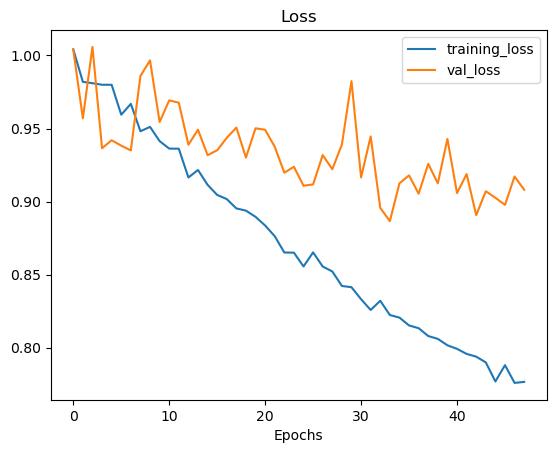

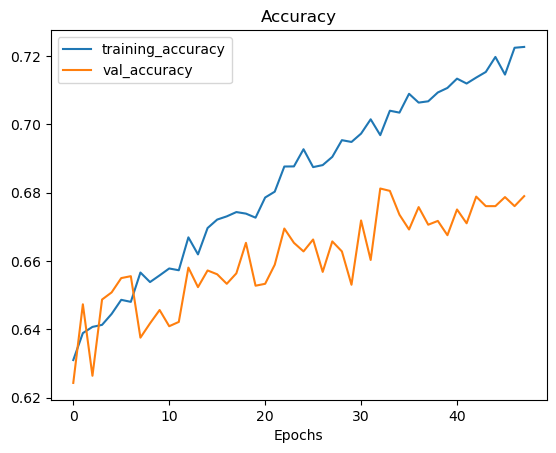

In [36]:
plot_loss_curves(history_3)

In [37]:
joblib.dump(CNN_Model, 'CNN_Model_Data_Aug_more_epoch.pkl')

['CNN_Model_Data_Aug_more_epoch.pkl']

In [60]:
# Simple CNN
def create_mini_model():
    input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))
    
    return model

In [61]:
mini_CNN =create_mini_model()

mini_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        9280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)        

In [53]:
mini_CNN.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

def scheduler(epoch, lr):
  if epoch % 7 == 0 and epoch > 0:
     return lr * tf.math.exp(-0.1)
  else:
     return lr

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [55]:
history_4 = mini_CNN.fit(train_data,
                          validation_data=test_data,
                          epochs=28,
                          batch_size=BATCH_SIZE,
                          callbacks=[callback],
                          steps_per_epoch=steps_per_epoch,
                          validation_steps=int(0.5*validation_steps))

Epoch 1/28
448/448 [==============================] - 47s 105ms/step - loss: 1.5707 - accuracy: 0.3925 - val_loss: 1.4333 - val_accuracy: 0.4508 - lr: 0.0010
Epoch 2/28
448/448 [==============================] - 47s 105ms/step - loss: 1.5224 - accuracy: 0.4129 - val_loss: 1.3801 - val_accuracy: 0.4759 - lr: 0.0010
Epoch 3/28
448/448 [==============================] - 48s 108ms/step - loss: 1.4869 - accuracy: 0.4258 - val_loss: 1.3620 - val_accuracy: 0.4771 - lr: 0.0010
Epoch 4/28
448/448 [==============================] - 51s 114ms/step - loss: 1.4581 - accuracy: 0.4373 - val_loss: 1.3309 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 5/28
448/448 [==============================] - 45s 101ms/step - loss: 1.4384 - accuracy: 0.4479 - val_loss: 1.3141 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 6/28
448/448 [==============================] - 45s 100ms/step - loss: 1.4166 - accuracy: 0.4591 - val_loss: 1.2860 - val_accuracy: 0.5096 - lr: 0.0010
Epoch 7/28
448/448 [==============================] 

In [56]:
mini_CNN.evaluate(test_data)

113/113 [==============================] - 7s 57ms/step - loss: 1.1445 - accuracy: 0.5644


[1.1444652080535889, 0.5643633604049683]

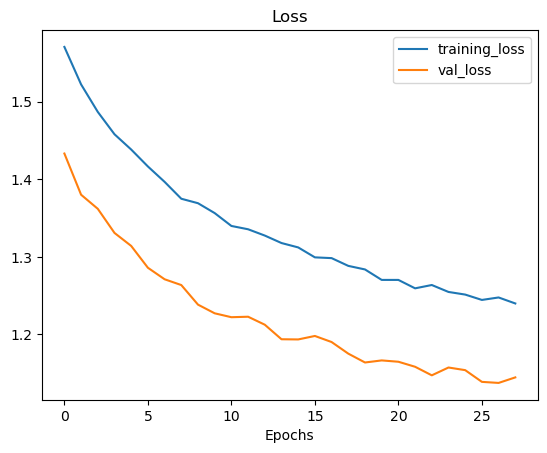

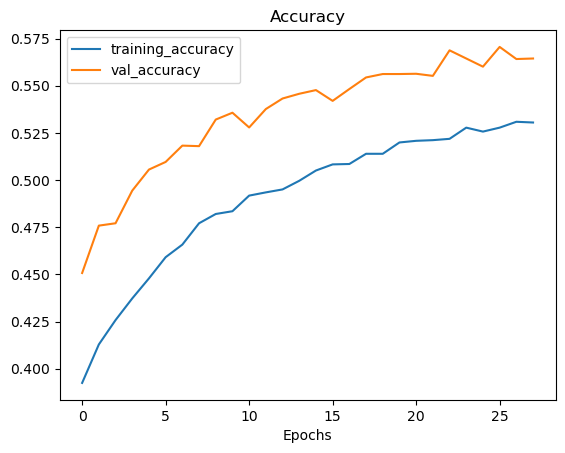

In [58]:
plot_loss_curves(history_4)